In [52]:
import numpy as np
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving studentpor.csv to studentpor (1).csv


In [53]:
import seaborn as sns

In [54]:
filename = 'studentpor.csv'

studentpor_df = pd.read_csv(filename)

print(studentpor_df.info())  # Veri bilgisi

print(studentpor_df.describe()) # Sayısal değerler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [55]:
studentpor_df.isnull().sum()  # eksik veri kontrolü

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [56]:
studentpor_df['G3'].value_counts()  # hedef değiişkinin dağılımı

,count
G3,
11,104
10,97
13,82
12,72
14,63
15,49
16,36
8,35
9,35


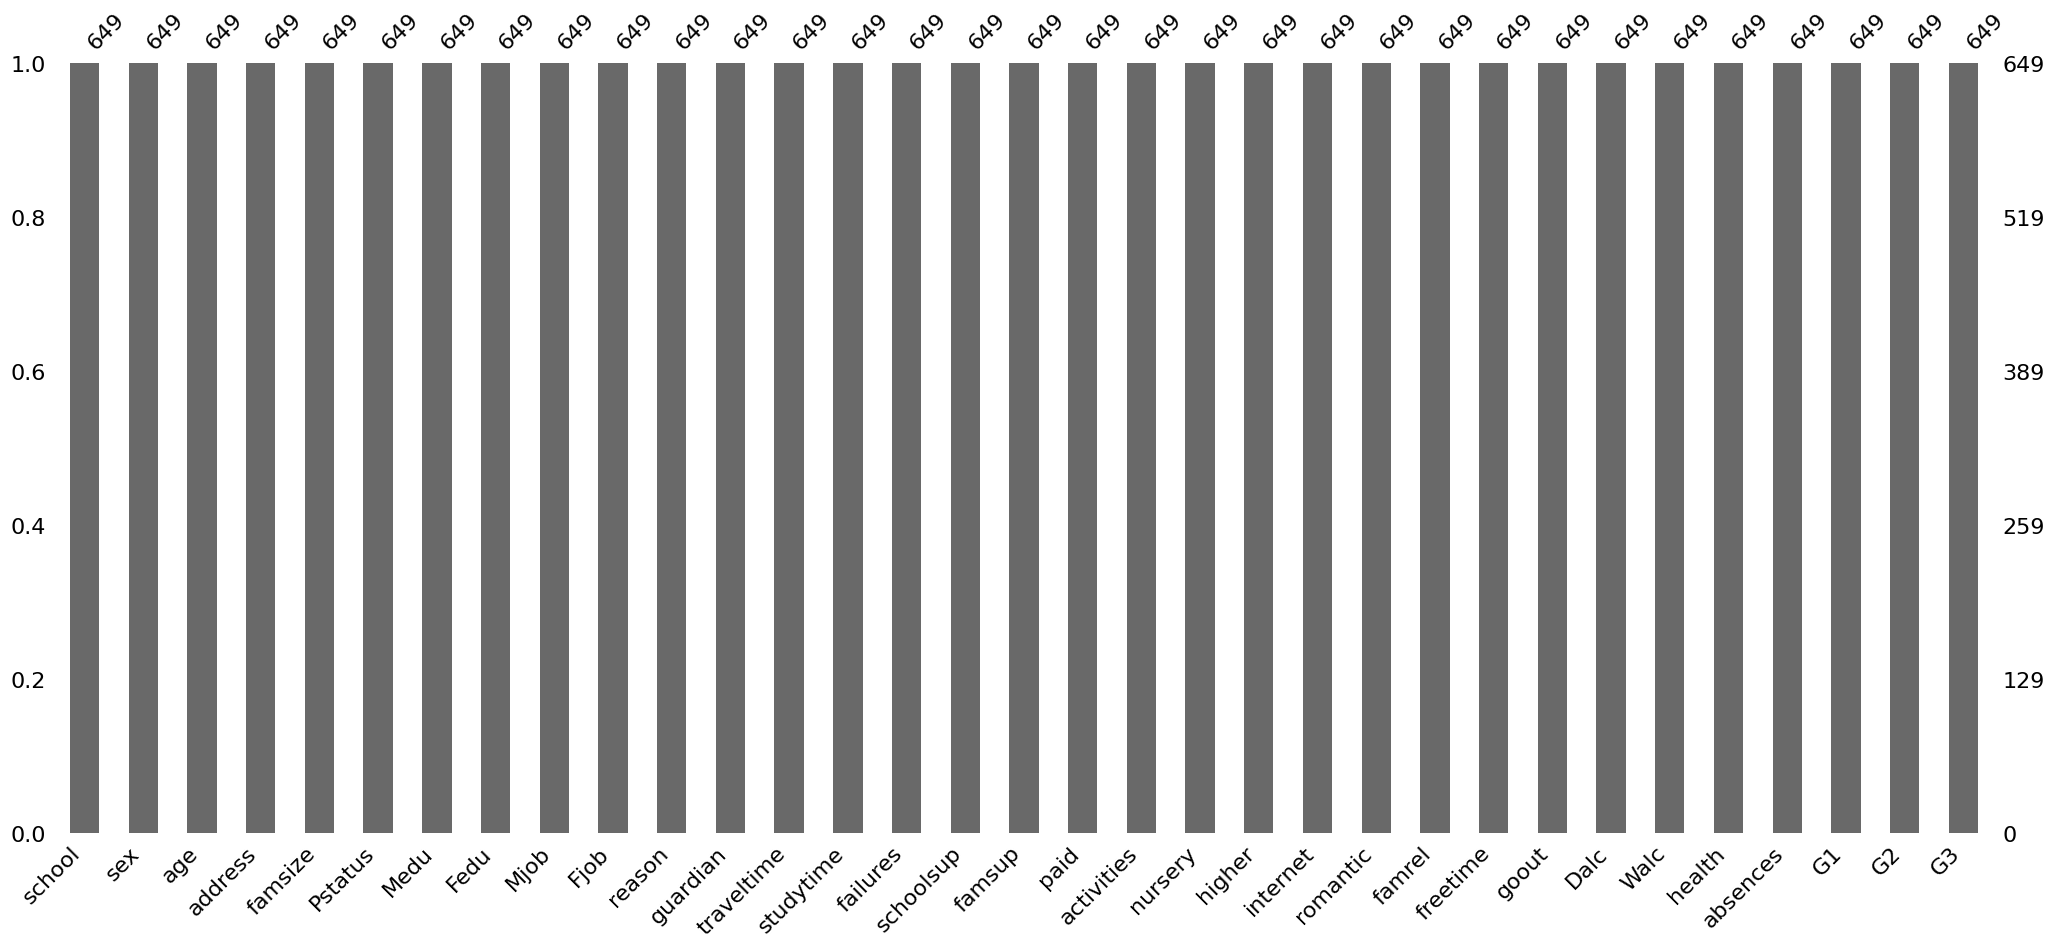

In [57]:
import missingno as msno   #eksik veri gösterimi
import matplotlib.pyplot as plt

msno.bar(studentpor_df)
plt.show()

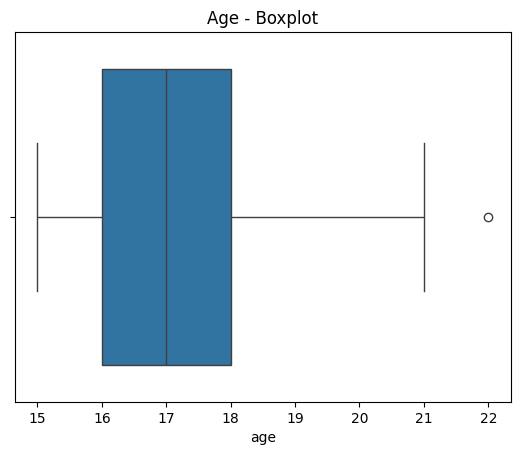

In [9]:
sns.boxplot(x = studentpor_df["age"])
plt.title("Age - Boxplot")
plt.show()

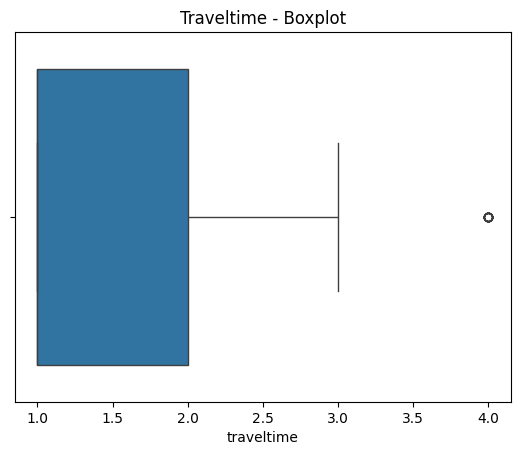

In [28]:
sns.boxplot(x = studentpor_df["traveltime"])
plt.title("Traveltime - Boxplot")
plt.show()

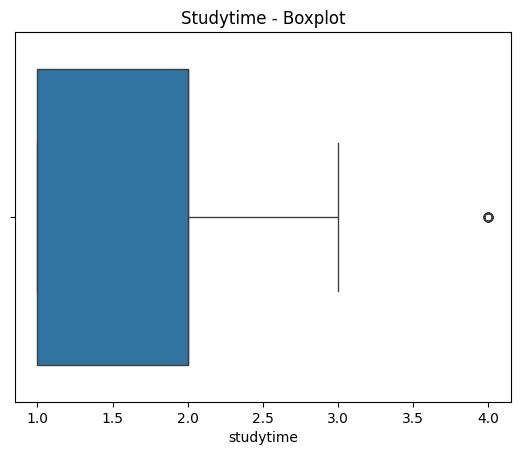

In [29]:
sns.boxplot(x = studentpor_df["studytime"])
plt.title("Studytime - Boxplot")
plt.show()

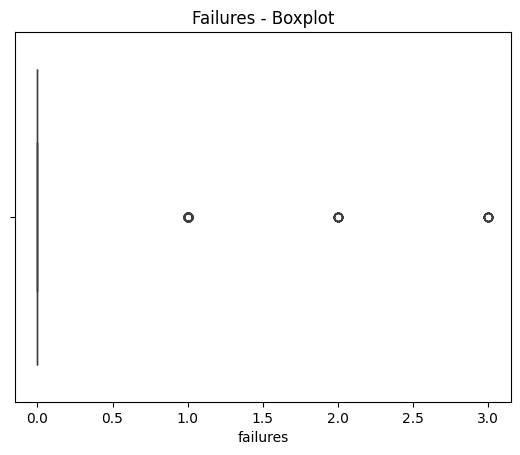

In [30]:
sns.boxplot(x = studentpor_df["failures"])
plt.title("Failures - Boxplot")
plt.show()

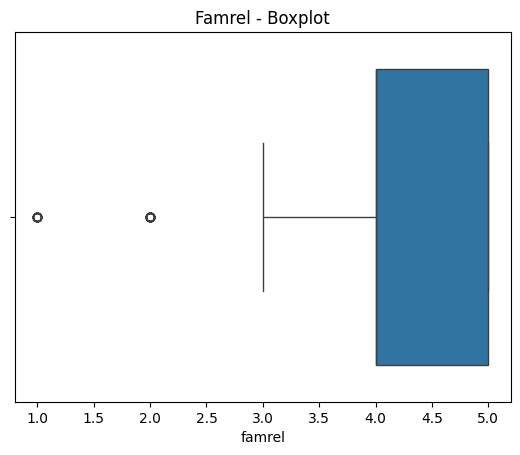

In [31]:
sns.boxplot(x = studentpor_df["famrel"])
plt.title("Famrel - Boxplot")
plt.show()

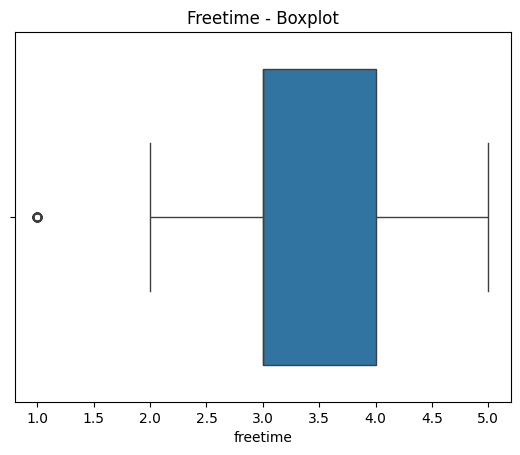

In [32]:
sns.boxplot(x = studentpor_df["freetime"])
plt.title("Freetime - Boxplot")
plt.show()

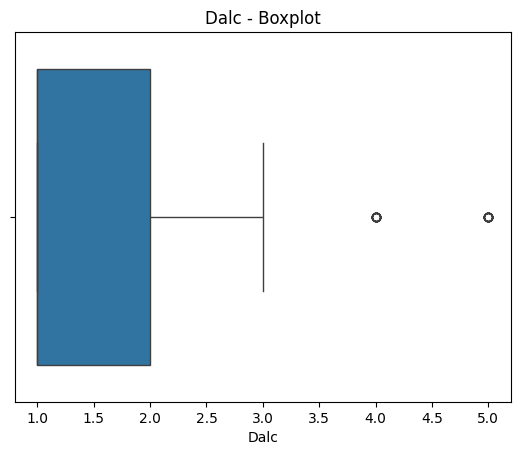

In [34]:
sns.boxplot(x = studentpor_df["Dalc"])
plt.title("Dalc - Boxplot")
plt.show()

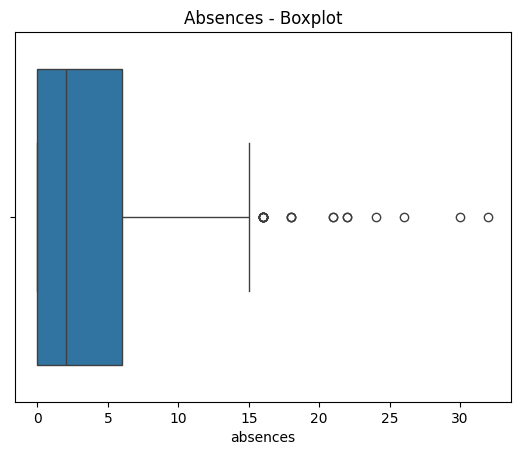

In [37]:
sns.boxplot(x = studentpor_df["absences"])
plt.title("Absences - Boxplot")
plt.show()

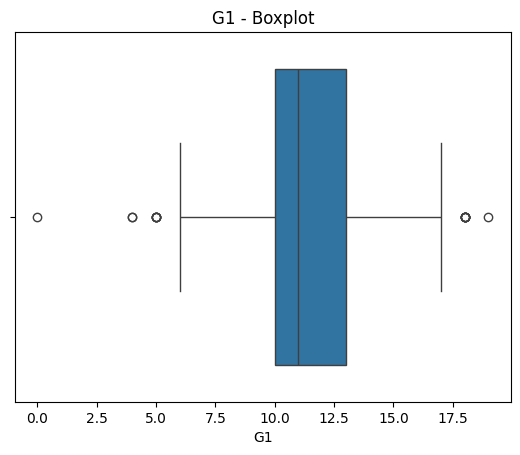

In [38]:
sns.boxplot(x = studentpor_df["G1"])
plt.title("G1 - Boxplot")
plt.show()

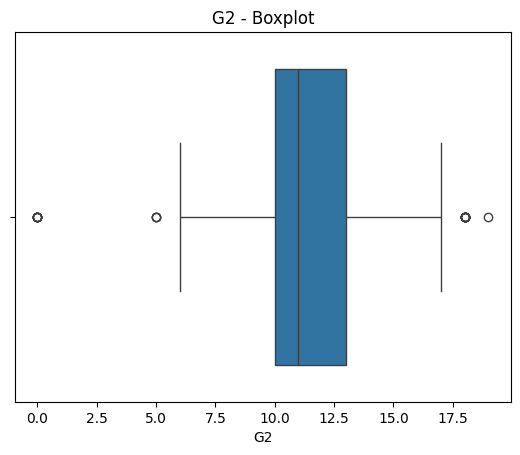

In [39]:
sns.boxplot(x = studentpor_df["G2"])
plt.title("G2 - Boxplot")
plt.show()

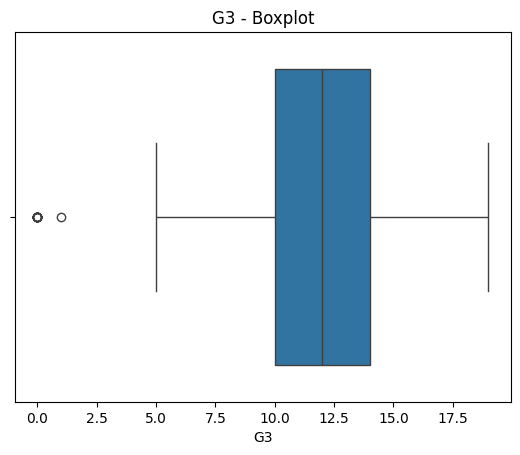

In [40]:
sns.boxplot(x = studentpor_df["G3"])
plt.title("G3 - Boxplot")
plt.show()

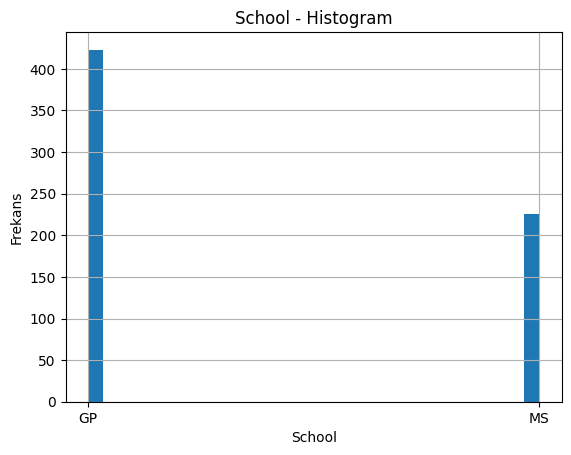

In [11]:
studentpor_df["school"].hist(bins=30)
plt.title("School - Histogram")
plt.xlabel("School")
plt.ylabel("Frekans")
plt.show()

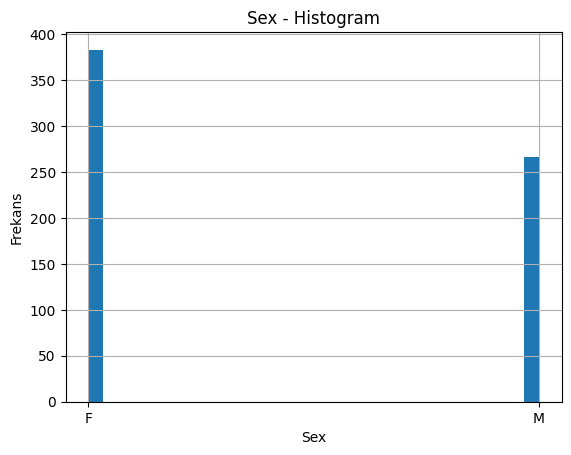

In [ ]:
studentpor_df["sex"].hist(bins=30)
plt.title("Sex - Histogram")
plt.xlabel("Sex")
plt.ylabel("Frekans")
plt.show()

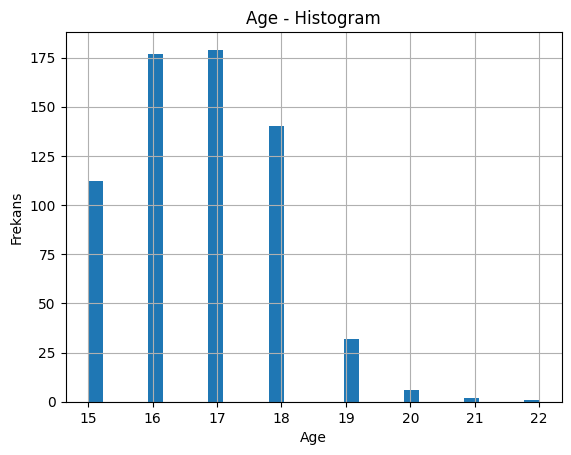

In [ ]:
studentpor_df["age"].hist(bins=30)
plt.title("Age - Histogram")
plt.xlabel("Age")
plt.ylabel("Frekans")
plt.show()

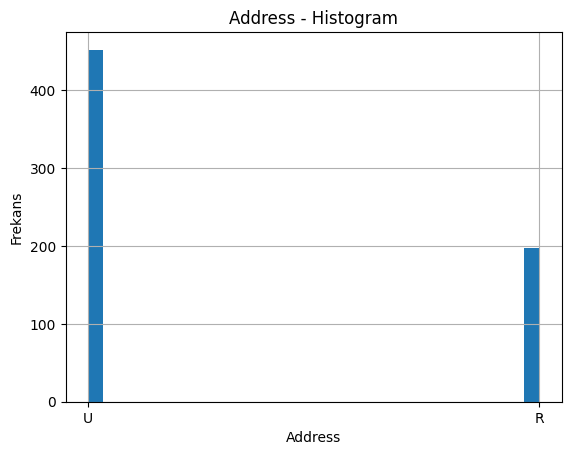

In [ ]:
studentpor_df["address"].hist(bins=30)
plt.title("Address - Histogram")
plt.xlabel("Address")
plt.ylabel("Frekans")
plt.show()

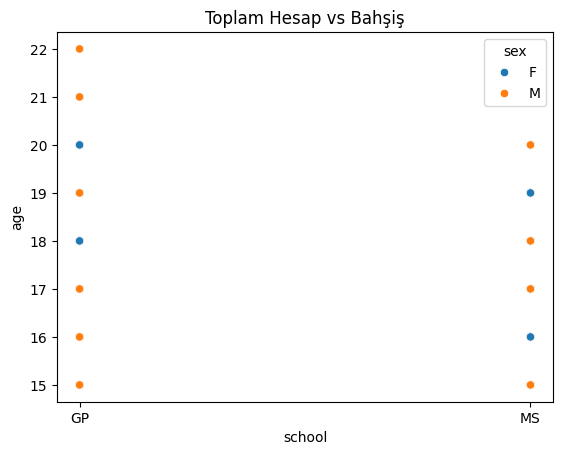

In [ ]:
sns.scatterplot(x="school", y="age", data=studentpor_df, hue="sex")
plt.title("Toplam Hesap vs Bahşiş")
plt.show()

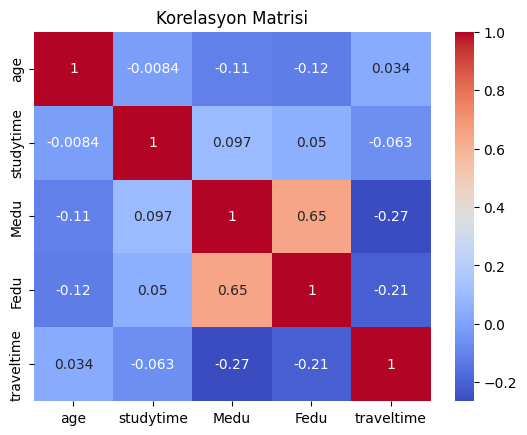

In [ ]:
selected_columns = ["age", "studytime", "Medu", "Fedu", "traveltime"]
corr1 = studentpor_df[selected_columns].corr()
sns.heatmap(corr1, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()


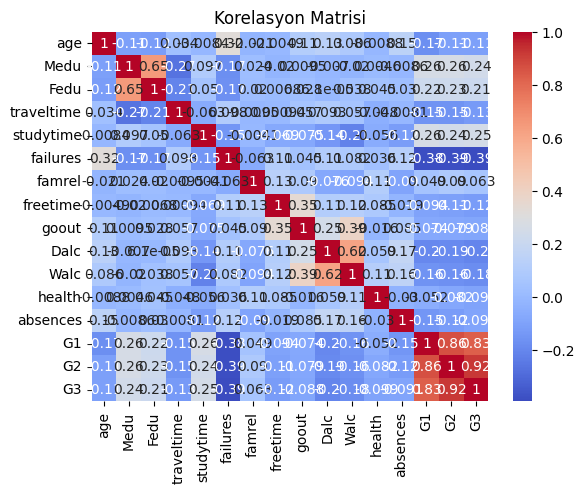

In [ ]:
corr = studentpor_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

In [58]:
# Her sütun için eksik veri oranı (satır sayısına göre)
missing_ratio = studentpor_df.isnull().sum() / len(studentpor_df)

# Yalnızca eksik verisi olan sütunları göster
missing_ratio = missing_ratio[missing_ratio > 0]

# Sonuçları yazdır
print(missing_ratio.sort_values(ascending=False))

Series([], dtype: float64)


In [59]:
# aykırı değer analizi
Q1 = studentpor_df["age"].quantile(0.25)
Q3 = studentpor_df["age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers_iqr = studentpor_df[(studentpor_df["age"] < lower_bound) | (studentpor_df["age"] > upper_bound)]
print(outliers_iqr)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
279     GP   M   22       U     GT3       T     3     1  services  services   

     ... famrel freetime  goout  Dalc  Walc health absences G1 G2 G3  
279  ...      5        4      5     5     5      1       12  7  8  5  

[1 rows x 33 columns]


In [60]:
studentpor_df["age_winsorized"] = studentpor_df["age"].clip(lower=lower_bound, upper=upper_bound)  # winsorizing ile uç değer kırpma

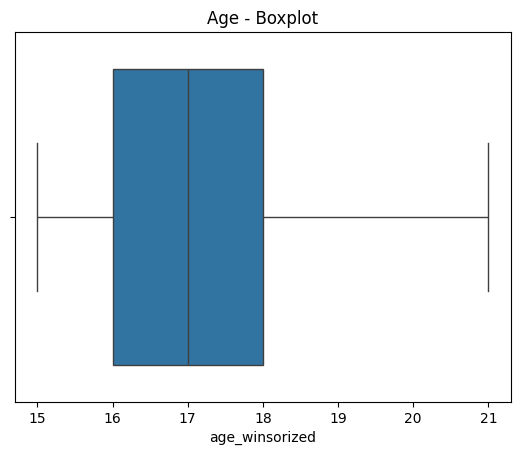

In [61]:
sns.boxplot(x=studentpor_df["age_winsorized"])
plt.title("Age - Boxplot")
plt.show()

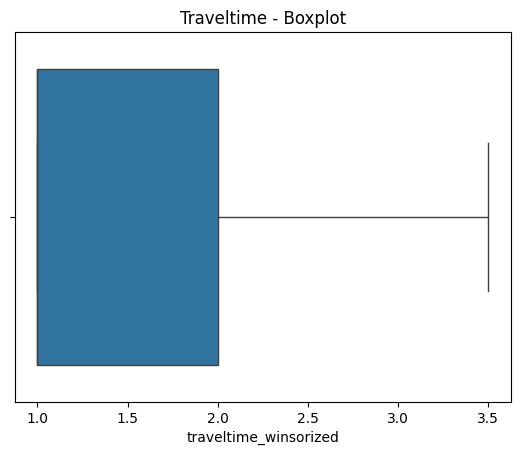

In [62]:
# aykırı değer analizi
Q1 = studentpor_df["traveltime"].quantile(0.25)
Q3 = studentpor_df["traveltime"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers_iqr = studentpor_df[(studentpor_df["traveltime"] < lower_bound) | (studentpor_df["traveltime"] > upper_bound)]
#print(outliers_iqr)

studentpor_df["traveltime_winsorized"] = studentpor_df["traveltime"].clip(lower=lower_bound, upper=upper_bound)  # winsorizing ile uç değer kırpma

sns.boxplot(x=studentpor_df["traveltime_winsorized"])
plt.title("Traveltime - Boxplot")
plt.show()

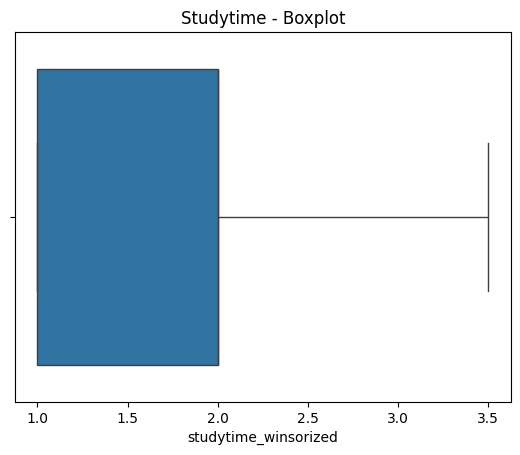

In [63]:
# aykırı değer analizi
Q1 = studentpor_df["studytime"].quantile(0.25)
Q3 = studentpor_df["studytime"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers_iqr = studentpor_df[(studentpor_df["studytime"] < lower_bound) | (studentpor_df["studytime"] > upper_bound)]
#print(outliers_iqr)

studentpor_df["studytime_winsorized"] = studentpor_df["studytime"].clip(lower=lower_bound, upper=upper_bound)  # winsorizing ile uç değer kırpma

sns.boxplot(x=studentpor_df["studytime_winsorized"])
plt.title("Studytime - Boxplot")
plt.show()

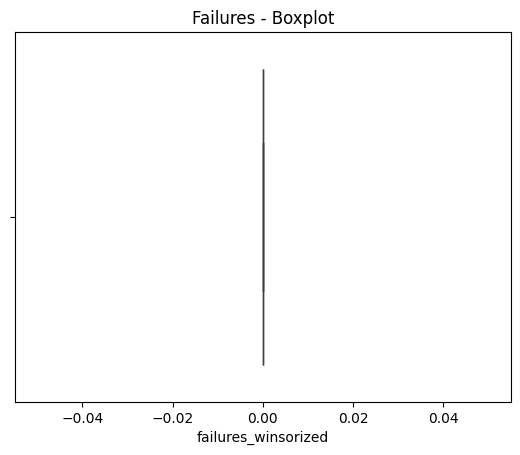

In [64]:
# aykırı değer analizi
Q1 = studentpor_df["failures"].quantile(0.25)
Q3 = studentpor_df["failures"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers_iqr = studentpor_df[(studentpor_df["failures"] < lower_bound) | (studentpor_df["failures"] > upper_bound)]
#print(outliers_iqr)

studentpor_df["failures_winsorized"] = studentpor_df["failures"].clip(lower=lower_bound, upper=upper_bound)  # winsorizing ile uç değer kırpma

sns.boxplot(x=studentpor_df["failures_winsorized"])
plt.title("Failures - Boxplot")
plt.show()

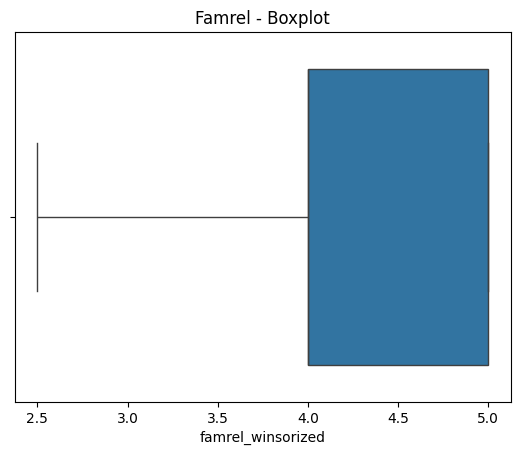

In [65]:
# aykırı değer analizi
Q1 = studentpor_df["famrel"].quantile(0.25)
Q3 = studentpor_df["famrel"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers_iqr = studentpor_df[(studentpor_df["famrel"] < lower_bound) | (studentpor_df["famrel"] > upper_bound)]
#print(outliers_iqr)

studentpor_df["famrel_winsorized"] = studentpor_df["famrel"].clip(lower=lower_bound, upper=upper_bound)  # winsorizing ile uç değer kırpma

sns.boxplot(x=studentpor_df["famrel_winsorized"])
plt.title("Famrel - Boxplot")
plt.show()

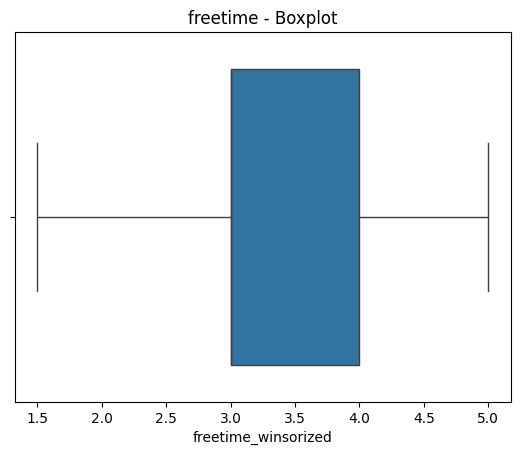

In [66]:
# aykırı değer analizi
Q1 = studentpor_df["freetime"].quantile(0.25)
Q3 = studentpor_df["freetime"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers_iqr = studentpor_df[(studentpor_df["freetime"] < lower_bound) | (studentpor_df["freetime"] > upper_bound)]
#print(outliers_iqr)

studentpor_df["freetime_winsorized"] = studentpor_df["freetime"].clip(lower=lower_bound, upper=upper_bound)  # winsorizing ile uç değer kırpma

sns.boxplot(x=studentpor_df["freetime_winsorized"])
plt.title("freetime - Boxplot")
plt.show()

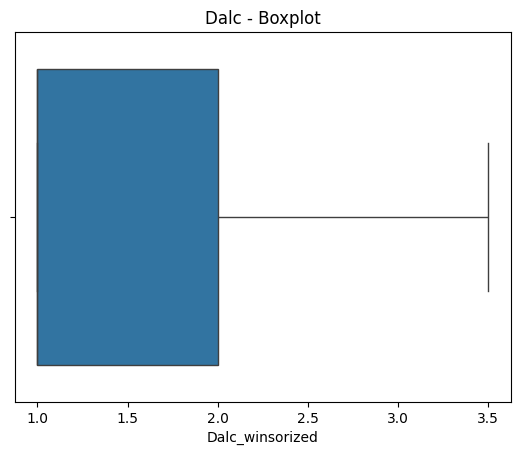

In [67]:
# aykırı değer analizi
Q1 = studentpor_df["Dalc"].quantile(0.25)
Q3 = studentpor_df["Dalc"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers_iqr = studentpor_df[(studentpor_df["Dalc"] < lower_bound) | (studentpor_df["Dalc"] > upper_bound)]
#print(outliers_iqr)

studentpor_df["Dalc_winsorized"] = studentpor_df["Dalc"].clip(lower=lower_bound, upper=upper_bound)  # winsorizing ile uç değer kırpma

sns.boxplot(x=studentpor_df["Dalc_winsorized"])
plt.title("Dalc - Boxplot")
plt.show()

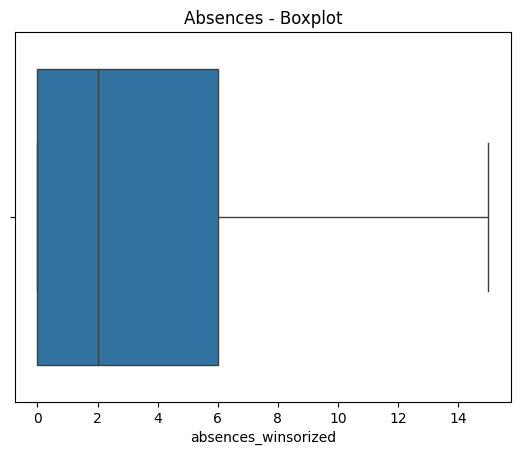

In [68]:
# aykırı değer analizi
Q1 = studentpor_df["absences"].quantile(0.25)
Q3 = studentpor_df["absences"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers_iqr = studentpor_df[(studentpor_df["absences"] < lower_bound) | (studentpor_df["absences"] > upper_bound)]
#print(outliers_iqr)

studentpor_df["absences_winsorized"] = studentpor_df["absences"].clip(lower=lower_bound, upper=upper_bound)  # winsorizing ile uç değer kırpma

sns.boxplot(x=studentpor_df["absences_winsorized"])
plt.title("Absences - Boxplot")
plt.show()

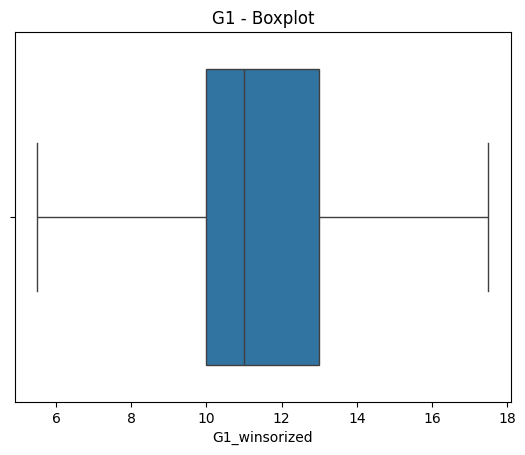

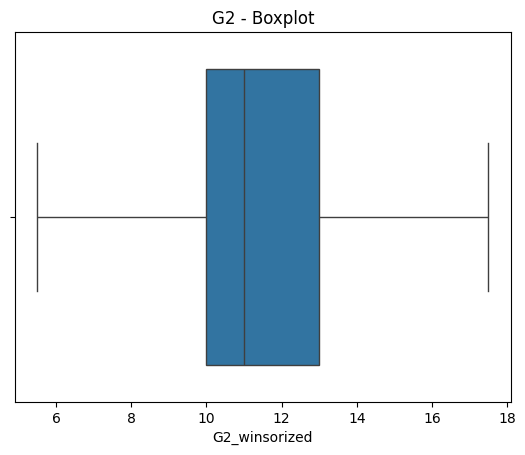

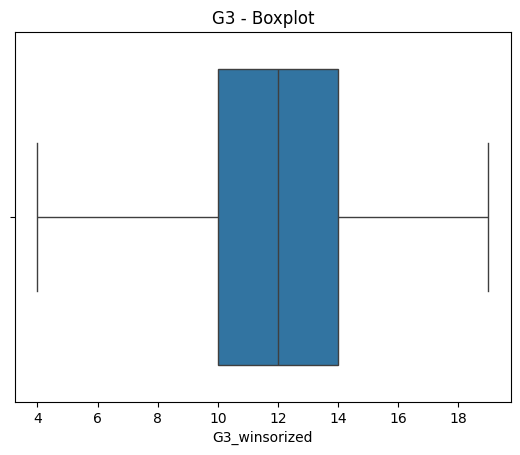

In [69]:
# aykırı değer analizi
Q1 = studentpor_df["G1"].quantile(0.25)
Q3 = studentpor_df["G1"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers_iqr = studentpor_df[(studentpor_df["G1"] < lower_bound) | (studentpor_df["G1"] > upper_bound)]
#print(outliers_iqr)

studentpor_df["G1_winsorized"] = studentpor_df["G1"].clip(lower=lower_bound, upper=upper_bound)  # winsorizing ile uç değer kırpma

sns.boxplot(x=studentpor_df["G1_winsorized"])
plt.title("G1 - Boxplot")
plt.show()


# aykırı değer analizi
Q1 = studentpor_df["G2"].quantile(0.25)
Q3 = studentpor_df["G2"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers_iqr = studentpor_df[(studentpor_df["G2"] < lower_bound) | (studentpor_df["G2"] > upper_bound)]
#print(outliers_iqr)

studentpor_df["G2_winsorized"] = studentpor_df["G2"].clip(lower=lower_bound, upper=upper_bound)  # winsorizing ile uç değer kırpma

sns.boxplot(x=studentpor_df["G2_winsorized"])
plt.title("G2 - Boxplot")
plt.show()


# aykırı değer analizi
Q1 = studentpor_df["G3"].quantile(0.25)
Q3 = studentpor_df["G3"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerler
outliers_iqr = studentpor_df[(studentpor_df["G3"] < lower_bound) | (studentpor_df["G3"] > upper_bound)]
#print(outliers_iqr)

studentpor_df["G3_winsorized"] = studentpor_df["G3"].clip(lower=lower_bound, upper=upper_bound)  # winsorizing ile uç değer kırpma

sns.boxplot(x=studentpor_df["G3_winsorized"])
plt.title("G3 - Boxplot")
plt.show()

In [89]:
from sklearn.preprocessing import LabelEncoder  #Label encoder

categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                    'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                    'famsup', 'paid', 'activities', 'nursery', 'higher',
                    'internet', 'romantic']

label_enc = LabelEncoder()
studentpor_df_encoded = studentpor_df.copy()

for col in categorical_cols:
    studentpor_df_encoded[col] = label_enc.fit_transform(studentpor_df_encoded[col])

print(studentpor_df_encoded.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   failures_winsorized  famrel_winsorized  freetime_winsorized  \
0                    0                4.0                  3.0   
1                    0                5.0                  3.0   
2                    0                4.0                  3.0   
3                    0                3.0                  2.0   
4                    0                4.0                  3.0   

   Dalc_winsorized  absences_winsorized  G1_winsorized  G2_winsorized  \
0              1.0                    4            5.5 

In [103]:
print(studentpor_df_encoded.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'age_winsorized', 'traveltime_winsorized', 'studytime_winsorized', 'failures_winsorized', 'famrel_winsorized', 'freetime_winsorized', 'Dalc_winsorized', 'absences_winsorized', 'G1_winsorized', 'G2_winsorized', 'G3_winsorized', 'school_label', 'sex_label']


In [150]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# 1. Sayısal veri sütunlarını veri çerçevesinden al
X = studentpor_df_encoded
y = studentpor_df_encoded['school_label']

# 2. Eğitim/test ayrımı 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. StandardScaler ile veriyi ölçekle
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


# 1. Sayısal veri sütunlarını veri çerçevesinden al
X = studentpor_df_encoded
y = studentpor_df_encoded['sex_label']

# 2. Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. StandardScaler ile veriyi ölçekle
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


# 1. Sayısal veri sütunlarını veri çerçevesinden al
X = studentpor_df_encoded
y = studentpor_df_encoded['age_winsorized']

# 2. Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. StandardScaler ile veriyi ölçekle
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


# 1. Sayısal veri sütunlarını veri çerçevesinden al
X = studentpor_df_encoded
y = studentpor_df_encoded['address']

# 2. Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. StandardScaler ile veriyi ölçekle
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

X = studentpor_df_encoded
y = studentpor_df_encoded['famsize']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['Pstatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['Medu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

X = studentpor_df_encoded
y = studentpor_df_encoded['Fedu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['Mjob']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

X = studentpor_df_encoded
y = studentpor_df_encoded['Fjob']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

X = studentpor_df_encoded
y = studentpor_df_encoded['reason']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

X = studentpor_df_encoded
y = studentpor_df_encoded['guardian']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['traveltime_winsorized']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

X = studentpor_df_encoded
y = studentpor_df_encoded['studytime_winsorized']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['failures_winsorized']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['schoolsup']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

X = studentpor_df_encoded
y = studentpor_df_encoded['famsup']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['activities']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['nursery']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['higher']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

X = studentpor_df_encoded
y = studentpor_df_encoded['internet']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

X = studentpor_df_encoded
y = studentpor_df_encoded['romantic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['famrel_winsorized']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

X = studentpor_df_encoded
y = studentpor_df_encoded['freetime_winsorized']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['goout']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['Dalc_winsorized']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

X = studentpor_df_encoded
y = studentpor_df_encoded['Walc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

X = studentpor_df_encoded
y = studentpor_df_encoded['absences_winsorized']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['G1_winsorized']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)


X = studentpor_df_encoded
y = studentpor_df_encoded['G2_winsorized']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

X = studentpor_df_encoded
y = studentpor_df_encoded['G3_winsorized']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)

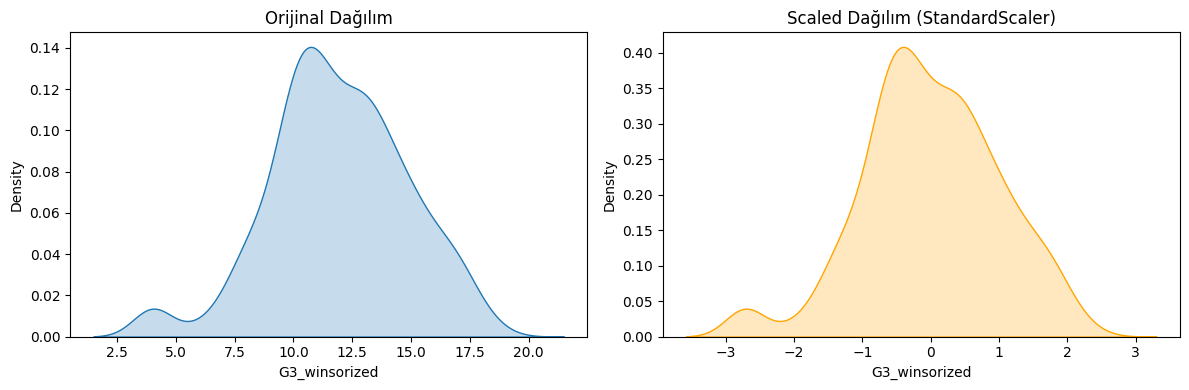

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
X_train_std_df = pd.DataFrame(X_train_std, columns=X_train.columns)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.kdeplot(X_train['G3_winsorized'], label='Orijinal', fill=True)
plt.title("Orijinal Dağılım")

plt.subplot(1, 2, 2)
sns.kdeplot(X_train_std_df['G3_winsorized'], label='StandardScaler', fill=True, color="orange")
plt.title("Scaled Dağılım (StandardScaler)")

plt.tight_layout()
plt.show()

In [152]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.4 MB/s eta 0:00:00


In [154]:
import warnings
warnings.filterwarnings('ignore')

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline



Linear Regression modeli eğitiliyor...

Linear Regression Sonuçları:
MSE: 0.0000
RMSE: 0.0000
MAE: 0.0000
R2 Score: 1.0000


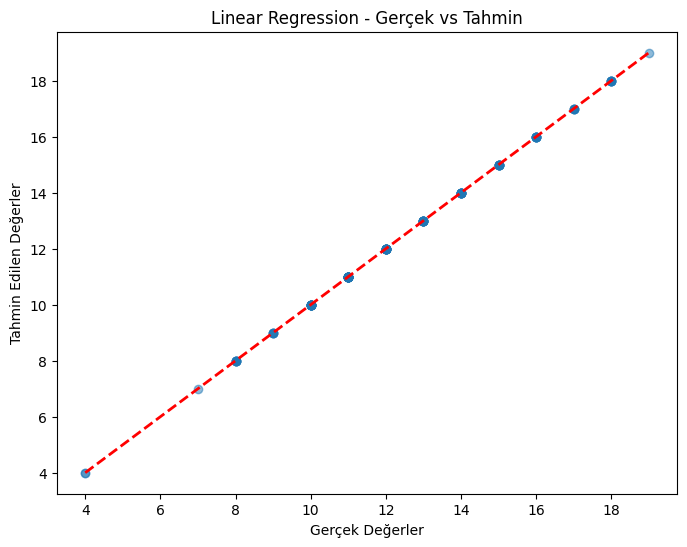


Random Forest modeli eğitiliyor...

Random Forest Sonuçları:
MSE: 0.0062
RMSE: 0.0786
MAE: 0.0125
R2 Score: 0.9993


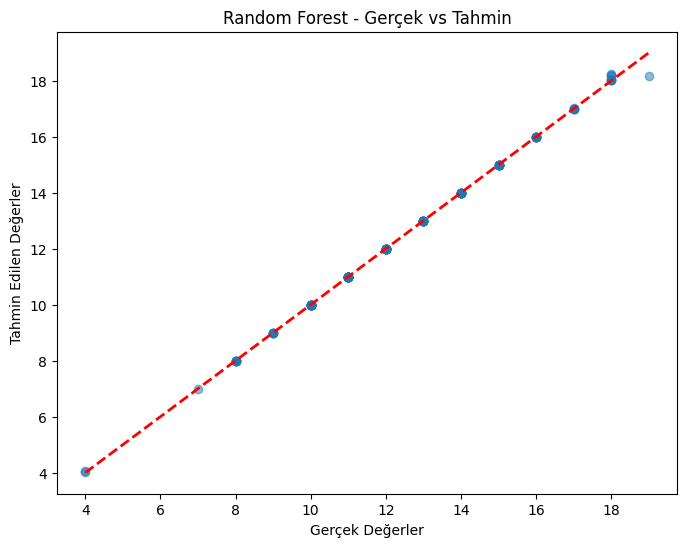


Gradient Boosting modeli eğitiliyor...

Gradient Boosting Sonuçları:
MSE: 0.0016
RMSE: 0.0398
MAE: 0.0047
R2 Score: 0.9998


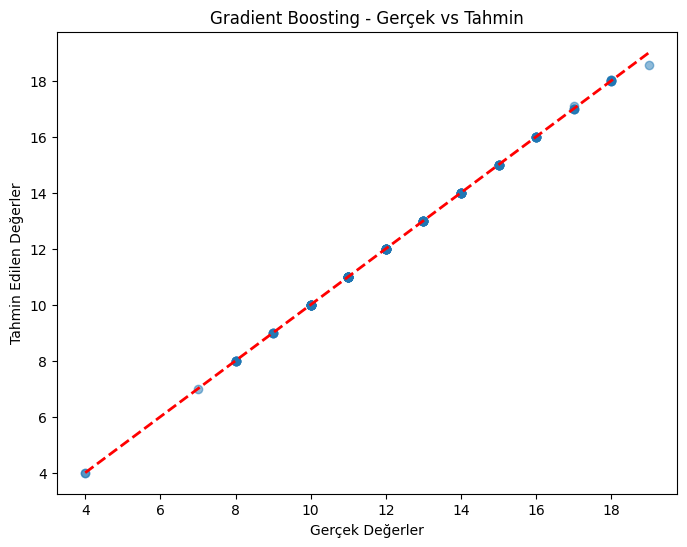


SVR modeli eğitiliyor...

SVR Sonuçları:
MSE: 0.9635
RMSE: 0.9816
MAE: 0.6198
R2 Score: 0.8863


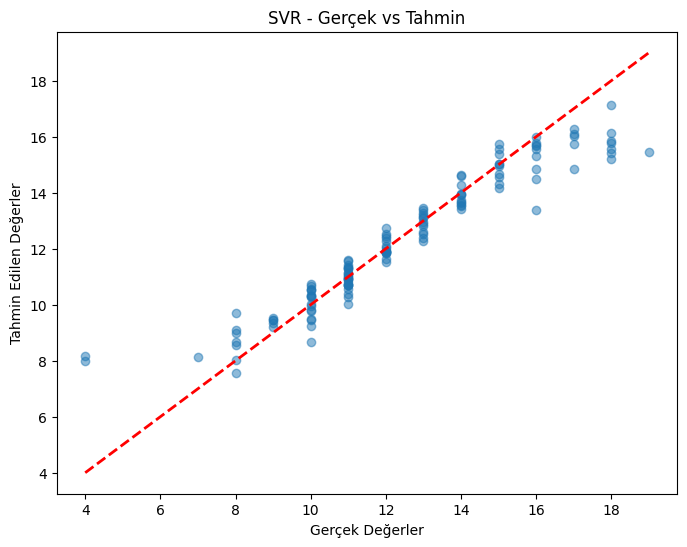

In [166]:
X = studentpor_df_encoded
y = studentpor_df_encoded['G3_winsorized']


# Modelleri tanımlama
models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ]),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR())
    ])
}

# Modelleri eğitme ve değerlendirme
results = {}
for name, model in models.items():
    print(f"\n{name} modeli eğitiliyor...")
    # Model eğitimi
    model.fit(X_train, y_train)

    # Tahminler
    y_pred = model.predict(X_test)

    # Sonuçları kaydetme
    results[name] = {
        'mse': mean_squared_error(y_test, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'mae': mean_absolute_error(y_test, y_pred),
        'r2': r2_score(y_test, y_pred)
    }

    print(f"\n{name} Sonuçları:")
    print(f"MSE: {results[name]['mse']:.4f}")
    print(f"RMSE: {results[name]['rmse']:.4f}")
    print(f"MAE: {results[name]['mae']:.4f}")
    print(f"R2 Score: {results[name]['r2']:.4f}")

    # Gerçek vs Tahmin grafiği
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Gerçek Değerler')
    plt.ylabel('Tahmin Edilen Değerler')
    plt.title(f'{name} - Gerçek vs Tahmin')
    plt.show()

In [ ]:
# linear regression:
#her metrik için en iyi sonucu verdi.
#R^2 skoru 1, overfitting veya veri sızıntısı olabilir.
#random forest:
#hatalar az, iyi bir model.
#gradient boosting:
#linear regression kadar olmasa da iyi sonuçlar, gerçeğe en yakın sonuçlar
#ve dengeli bir model.
#SVR:
#En kötü sonuçlar, yetersiz öğrenme (underfitting) var.
